# **LAB-4:** Motion Estimation and Event Detection in a Video
### **Objective:**
### Detect motion and specific events in a video using frame differencing or optical flow to estimate motion and identify events without machine learning.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from moviepy.video.io import ImageSequenceClip

#### Utility functions

In [2]:
def generateOutputVideo(img_list,file_name):
    clip = ImageSequenceClip.ImageSequenceClip(img_list,fps=fps)
    clip.write_videofile(file_name+'.mp4')

In [3]:
def plotFn(row, col, f_s, img_list, title, color=None):
    l = len(img_list)
    if l==0:
        return "Empty list!"
    fig, axes = plt.subplots(row,col,figsize=f_s)

    for i in range(row):
        for j in range(col):
            n = col*i + j
            if n>=l:
                break
            axes[i][j].imshow(img_list[n],cmap=color)
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
            axes[i][j].set_title(title + " " + str(n))
    
    plt.show()

In [4]:
def getFrameList(video):
    success = True
    frameList = []
    while success:
        success, frame = video.read()
        if not success:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frameList.append(frame)
    return frameList

### **1. Load Video:** Load the provided video using OpenCV.

In [5]:
vid_path = r'videos/video1.mp4'
video = cv2.VideoCapture(vid_path)
fps = video.get(cv2.CAP_PROP_FPS)

In [6]:
frameList = getFrameList(video)

In [7]:
len(frameList)

257

In [8]:
n = 120

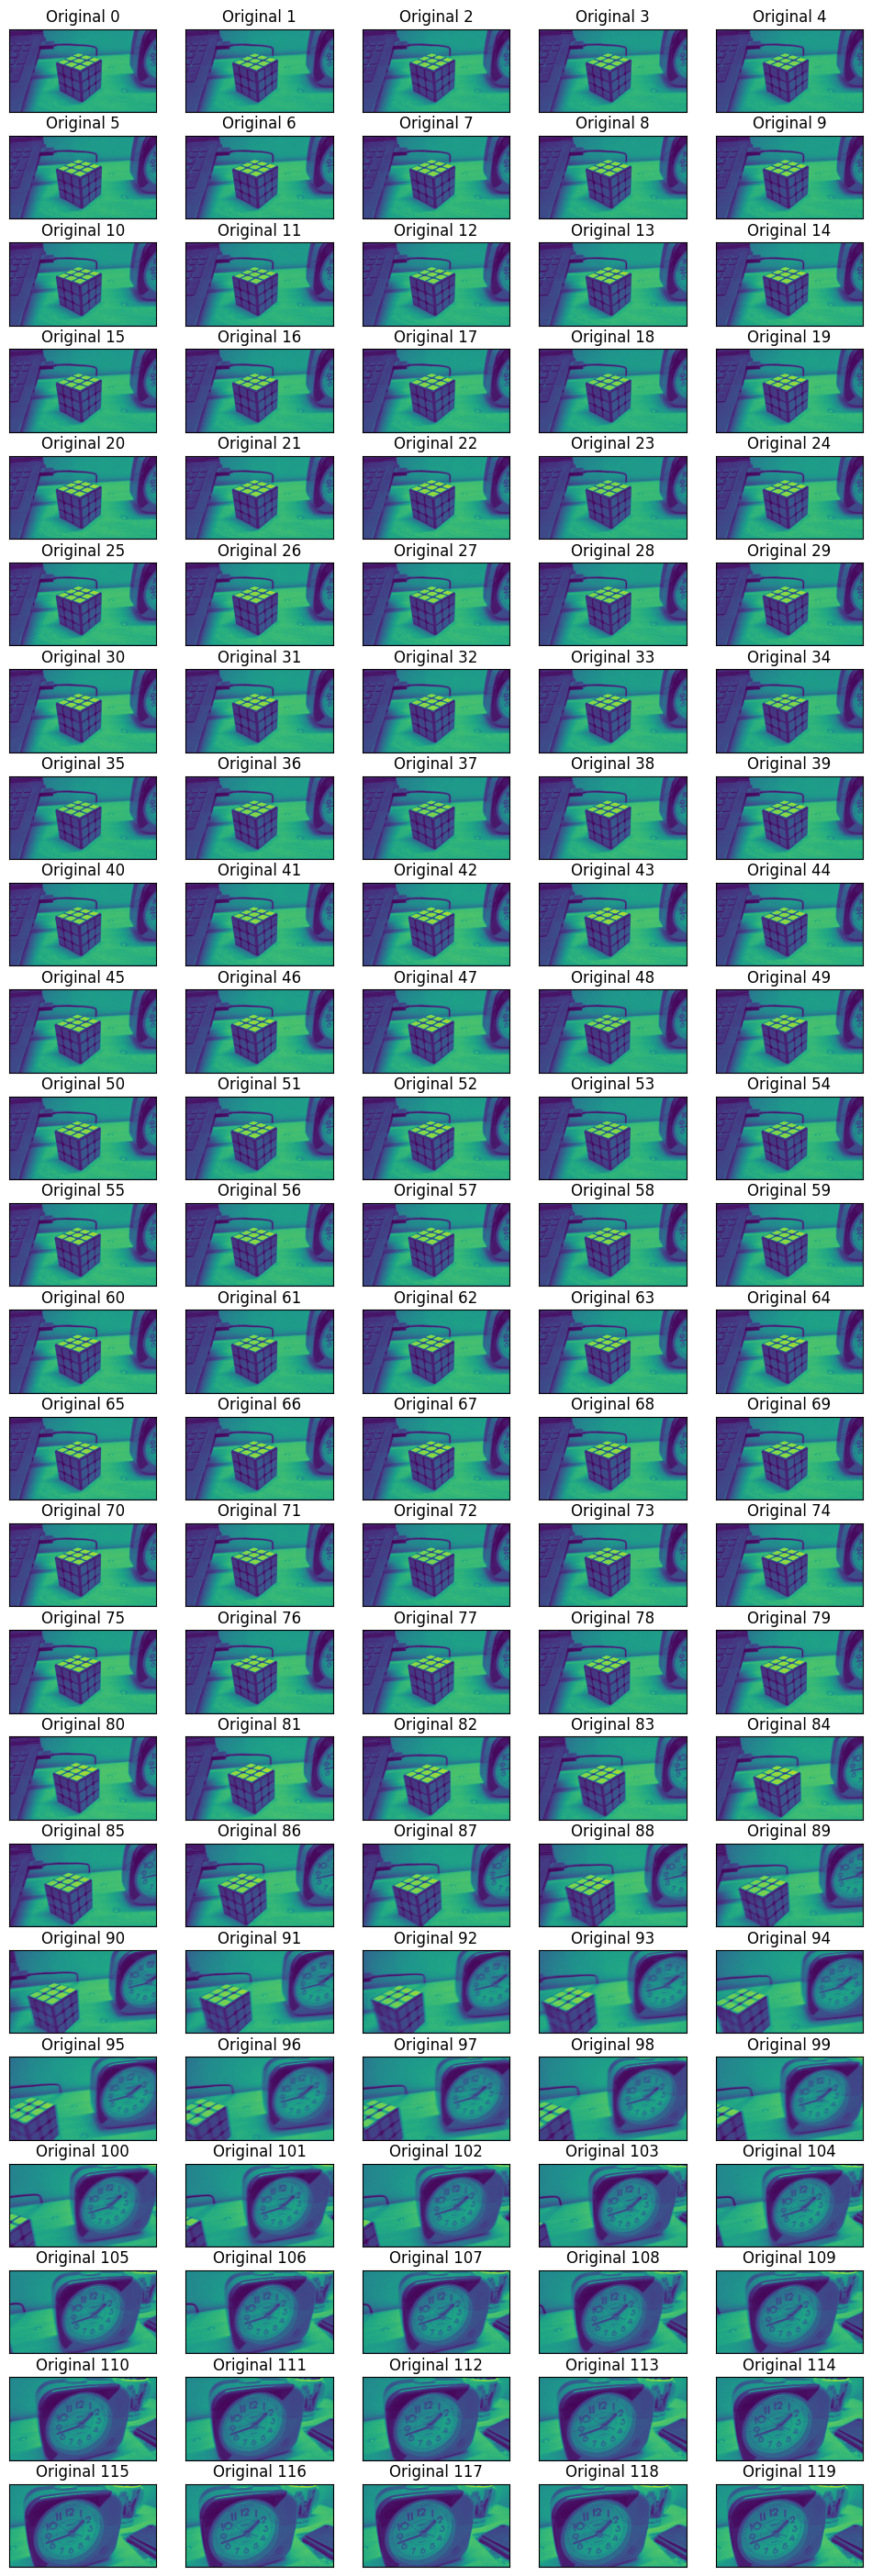

In [9]:
plotFn(24, 5, (12,36), frameList[:n], "Original")

### **2. Motion estimation:** Use frame differencing (Histogram comparision) to detect changes between consecutive frames.
#### Subtract consecutive frames and threshold the difference to identify regions of motion.

#### Necessary functions

In [10]:
def compute_histogram(image):
    # histogram = np.zeros(256, dtype=int)
    # height, width = image.shape

    # for i in range(height):
    #     for j in range(width):
    #         intensity = image[i, j]
    #         histogram[intensity] += 1
    return cv2.calcHist([image], [0], None, [256], [0, 256])

In [11]:
def getChanges(frameList):
    histograms_list = [compute_histogram(i) for i in frameList]
    similarity_list = [cv2.compareHist(histograms_list[i-1], histograms_list[i], cv2.HISTCMP_CORREL) for i in range(1,len(histograms_list))]
    difference_list = [cv2.absdiff(frameList[i-1], frameList[i]) for i in range(1,len(frameList))]
    thresh_list = [cv2.threshold(i, 25, 255, cv2.THRESH_BINARY)[1] for i in difference_list]
    return similarity_list, thresh_list

In [12]:
similarity_list, thresh_list = getChanges(frameList)

#### Plotting for first 50 frames for simplicity
#### Histogram similarity

In [13]:
similarity_list[69:n]

[0.9986207133040274,
 0.9993092007685028,
 0.9996770838794571,
 0.9994541666995325,
 0.9988969278494207,
 0.999152842138366,
 0.9995462429844236,
 0.9986486058615746,
 0.9982172677817565,
 0.9964820645004633,
 0.9878645749581723,
 0.9925148720745434,
 0.99208994096486,
 0.9919422049915882,
 0.9916555834447244,
 0.9952443079731759,
 0.9916701466782231,
 0.9859424282819883,
 0.9856444137287422,
 0.9859655752537572,
 0.9855335024456894,
 0.9843837921452347,
 0.9732837817906993,
 0.9845700493169424,
 0.980331571372944,
 0.9761315241807904,
 0.9745450682118614,
 0.982717813393318,
 0.9826475684526836,
 0.9793683651254931,
 0.9883767227422475,
 0.9870755510016118,
 0.9874124617020212,
 0.9939900360641182,
 0.9912186575824229,
 0.9901003326611575,
 0.9937983561404425,
 0.9917248280961978,
 0.9929123514546069,
 0.9950634398378614,
 0.9949181634204047,
 0.992102610380769,
 0.9915146574444811,
 0.992958187941955,
 0.9850650427552351,
 0.9958406659857519,
 0.9966441751614338,
 0.9889949380548451,

#### Regions of motion in the video

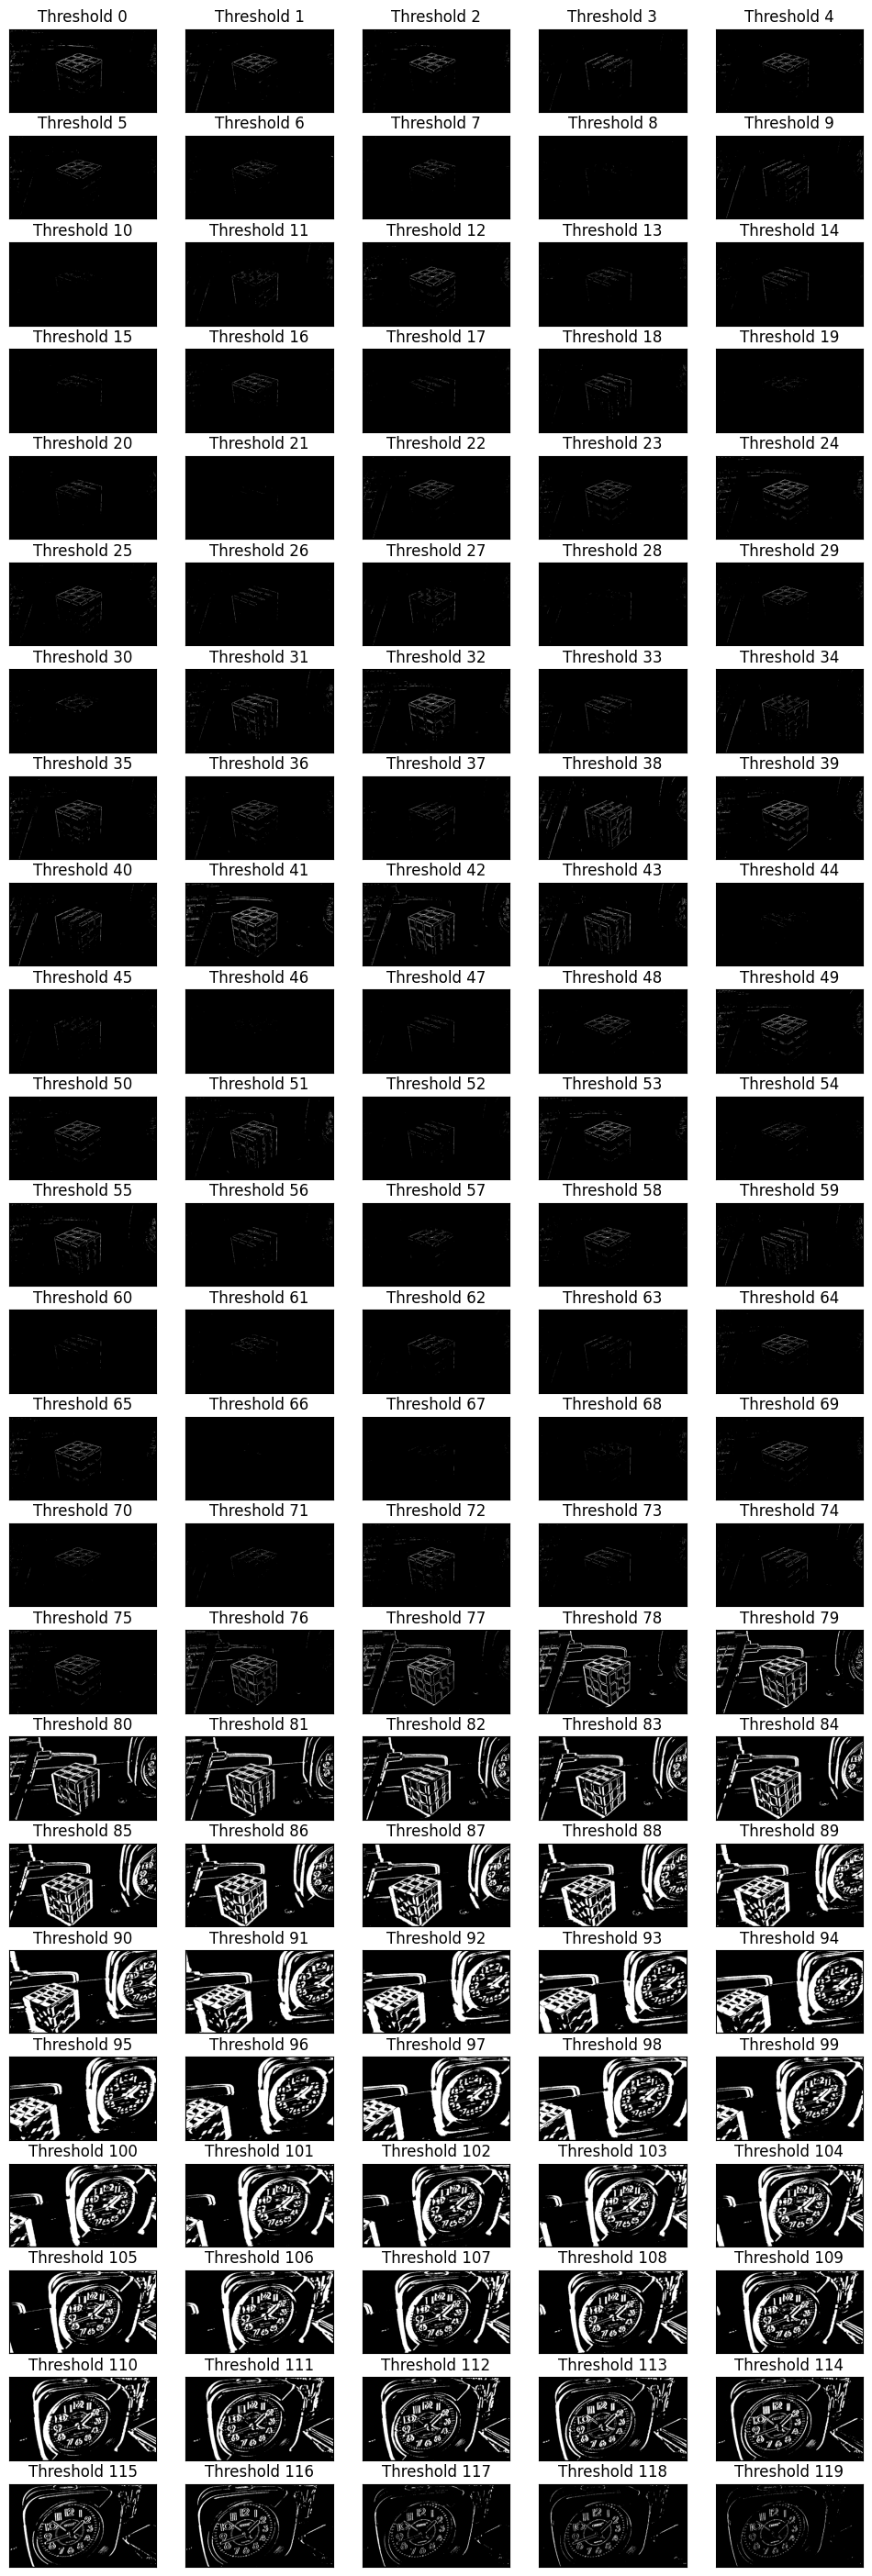

In [14]:
plotFn(24, 5, (12,36), thresh_list[:n], "Threshold",'gray')

### **3. Event Detection:** 
Detect significant motion events, such as sudden movements or object appearances, based on the intensity of motion detected in specific regions.

Identify and mark frames where events occur based on changes in motion intensity or region activity.

In [15]:
def getContours(thresh, frame):
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust area threshold as needed
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return frame

#### Contours marking the regions of motion

In [16]:
contours_list = [getContours(thresh_list[i], frameList[i]) for i in range(len(thresh_list))]

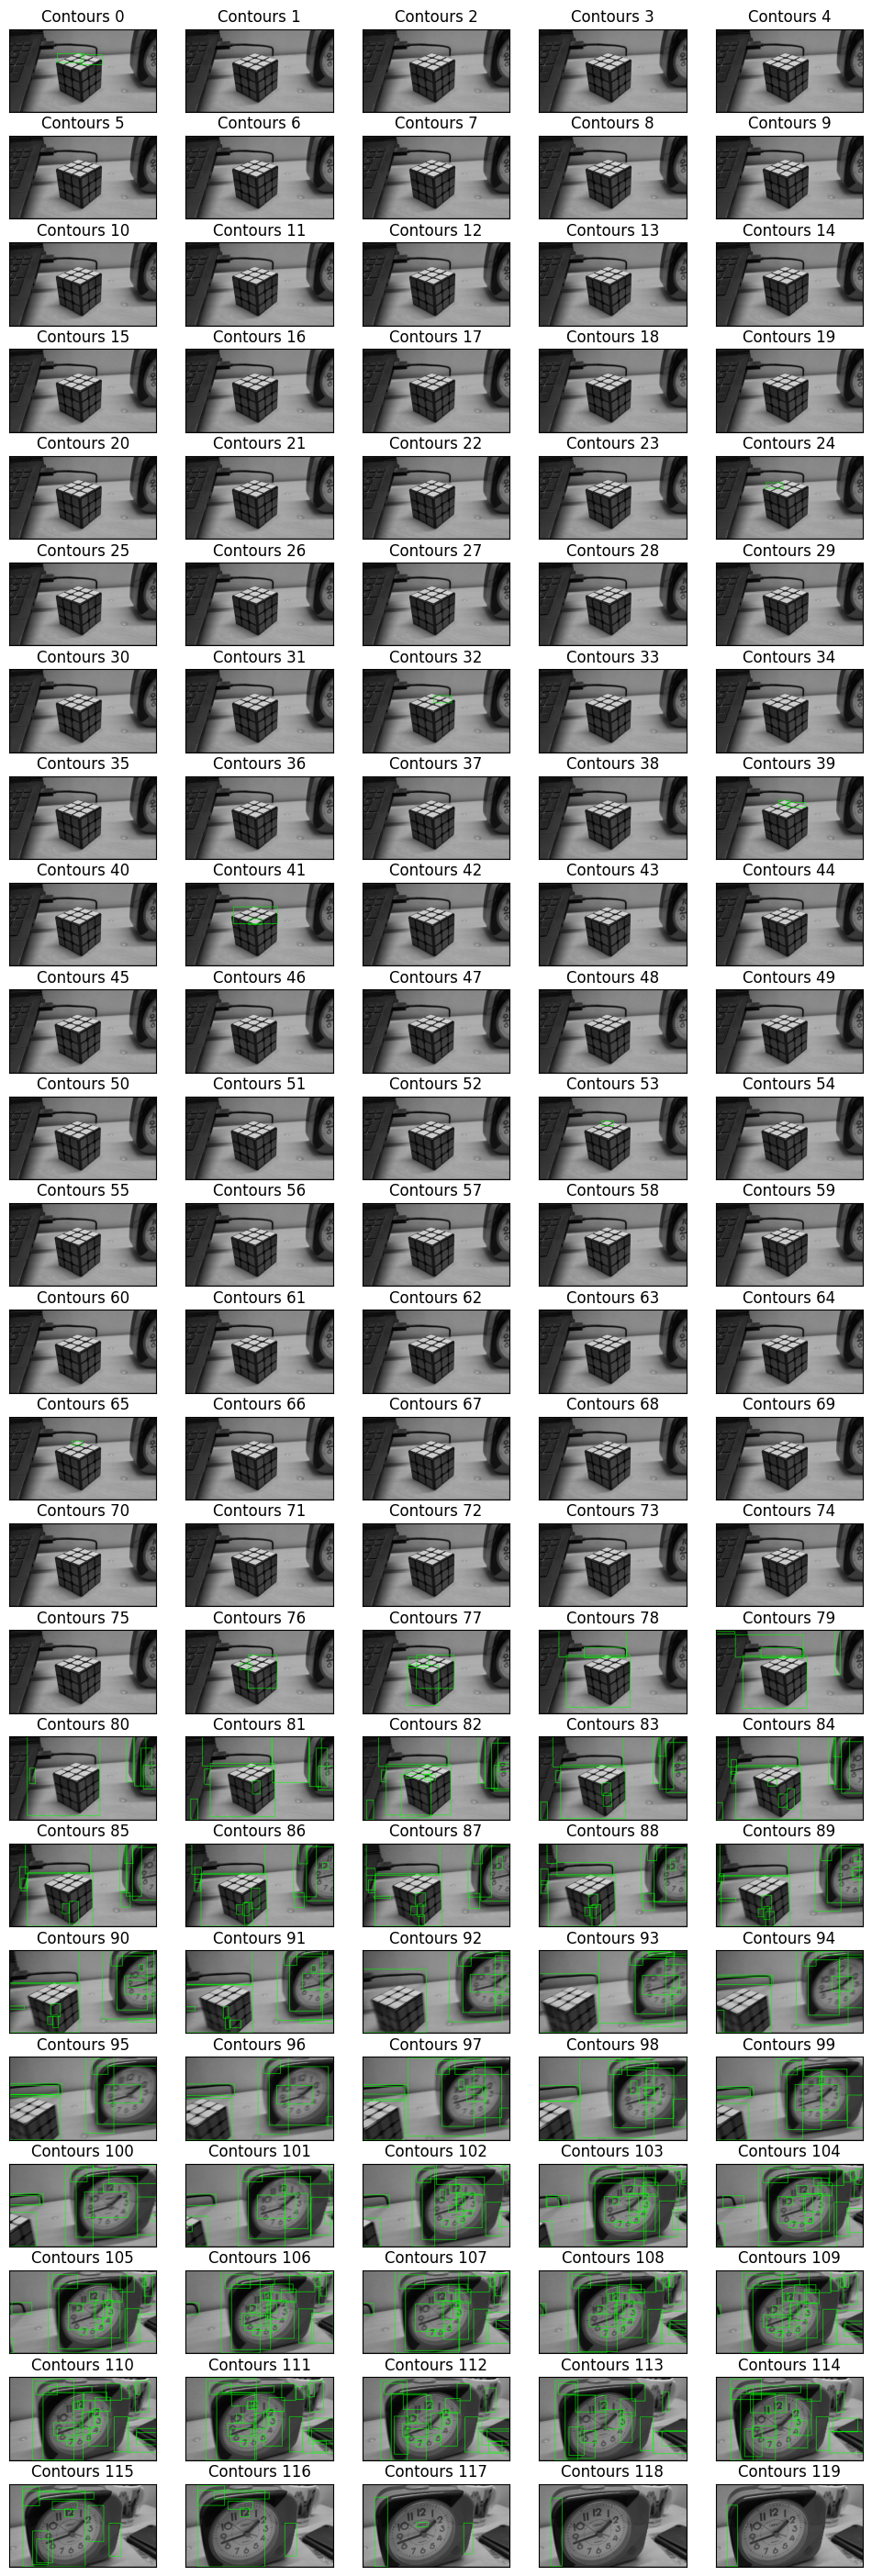

In [17]:
plotFn(24, 5, (12,36), contours_list[:n], "Contours",'gray')

#### **4. Result**
Visualize motion by highlighting moving regions in each frame.

Display and annotate the frames where events were detected, along with timestamps.

In [18]:
#generatiing the threshold video
thresh_3chan = [cv2.cvtColor(i, cv2.COLOR_GRAY2RGB) for i in thresh_list]
generateOutputVideo(thresh_3chan,'videos/thresh_op')

Moviepy - Building video videos/thresh_op.mp4.
Moviepy - Writing video videos/thresh_op.mp4



Moviepy - Done !
Moviepy - video ready videos/thresh_op.mp4


In [19]:
#generatiing the contour video
generateOutputVideo(contours_list,'videos/contours_op')

Moviepy - Building video videos/contours_op.mp4.
Moviepy - Writing video videos/contours_op.mp4



Moviepy - Done !
Moviepy - video ready videos/contours_op.mp4
